# The Battle of Neighborhoods
It is very easy for people to repeat the "Neighborhoods" project again with other cities' data, actually, most repositories which can be found on Github did repeat "Neighborhoods" and passed the assignment.

This time, as a challenge， I want to try another algorithm as practice.

## Introduction

As a Chinese, especially who live in Beijing, always suffers from air pollution. It will be awesome if we can predict its happening in the future, then we can be prepared before we go outdoor.

Air pollution data, is time series, there are several methodologies to do forecast/prediction:
* Linear regression
* Multi regression
* Polynomial regression
* ARiMA
* RNN
* LSTM

As required by the assignment, we need to choose a machine-learning algorithm.
Here, I choose LSTM(Long Short Term Memory), which is included in Keras Library

## Data set preparation

UCI Machine Learning Repository has the air pollution data from year 2010 to 2014, which is recorded by US Embassy in Beijing, and uploaded by Peking University student, Songxi Chen.

You can find it here:

[Data Source Page of UCI](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot

In [2]:
# import data from downloaded data file
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Through the introduct of UCI data source page, we can get:
#### Attribute Information:
* No: row number 
* year: year of data in this row 
* month: month of data in this row 
* day: day of data in this row 
* hour: hour of data in this row 
* pm2.5: PM2.5 concentration (ug/m^3) 
* DEWP: Dew Point
* TEMP: Temperature 
* PRES: Pressure (hPa) 
* cbwd: Combined wind direction 
* Iws: Cumulated wind speed (m/s) 
* Is: Cumulated hours of snow 
* Ir: Cumulated hours of rain 

In [4]:
# date restored in the dataframe is separated into Year, Month, Day and Hour. build a function to combine them to "date" as pandas Datetime type
def parse(x):
    return datetime.strptime(" ".join([str(x.year),str(x.month),str(x.day),str(x.hour)]), '%Y %m %d %H')

In [5]:
# apply to the dataframe by row with axis=1
df['date'] = df[['year', 'month', 'day', 'hour']].apply(parse,axis = 1)

In [6]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [7]:
# reindex the dataframe and drop the unnecessary columns
df.index = df['date']
df.drop(columns=['No','year','month','day','hour','date'],inplace=True)

In [8]:
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [9]:
# rename the columns more clear
df = df.rename(columns={'DEWP':'dew','TEMP':'temp', 'PRES':'press','cbwd':'wind_dir','Iws':'wind_speed','Is':'snow','Ir':'rain'})

In [10]:
df.head()

,pm2.5,dew,temp,press,wind_dir,wind_speed,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [11]:
# check the missing data
df[df['pm2.5'].isna()].shape[0]

2067

In [12]:
# fill the missing data with 0
df['pm2.5'].fillna(0, inplace=True)

In [13]:
# It seems in the first 1 day (new year holiday) there is no data, remove them
df = df[24:]

In [14]:
df.head()

,pm2.5,dew,temp,press,wind_dir,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


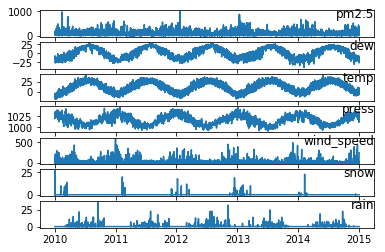

In [15]:
# use mathplotlib to plot each time series
# due to the warning of future version, we need to register matplotlib converters when using pandas to plot datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cols = list(df.columns)
cols.remove('wind_dir')

for i, col in enumerate(cols):
    pyplot.subplot(len(cols), 1, i+1)
    pyplot.plot(df[col])
    pyplot.title(col, y=0.5, loc='right')
pyplot.show()

## LSTM training data preparation 

In this step, we need to frame the dataset as a supervised learning problem and normalizing the input variables.

Refer to this blog [link](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/),
we will define a new Python function named series_to_supervised() that takes a univariate or multivariate time series and frames it as a supervised learning dataset.

The function takes four arguments:
* data: Sequence of observations as a list or 2D NumPy array. Required.
* n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
* n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
* dropnan: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.

The function returns a single value:
* return: Pandas DataFrame of series framed for supervised learning.

In [16]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

Start data preparation

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [18]:
values = df.values

In [19]:
# One-hot encoding wind directions
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

In [20]:
# change all datatype to float
values = values.astype('float32')

In [21]:
# normalization all features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [22]:
# use defined function to reframe dataset
reframed = series_to_supervised(scaled, 1, 1)

In [23]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0


In [24]:
# drop unnecessary columns (we only need to predict next hour pm2.5, no need to predict all features, so we keep all feature(t-1)data and target feature(t)data)
reframed.drop(reframed.columns[9:], axis=1, inplace=True)

In [25]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


## Split data into train set and test set

we need to split the dataset into train set and test set, then splits the train set and test set into input and output variables. 

Finally, the inputs (X) are reshaped into the 3D format expected by LSTM, [samples, timesteps, features]

In [26]:
# split reframed data into train set and test set, here we choose one year to train and others to test
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [27]:
print(train.shape)
print(test.shape)

(8760, 9)
(35039, 9)


In [28]:
# split train and test sets into inputs and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [29]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(8760, 8)
(8760,)
(35039, 8)
(35039,)


In [30]:
# reshape input sets to 3D format expected by LSTM [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

## Define LSTM model

Define the LSTM with __50__ neurons in the first hidden layer and __1__ neuron in the output layer for prediction.

The input shape include __8__ features

Time step is __1__

Use the __Mean Absolute Error (MAE)__ loss function and the efficient __Adam__ version of stochastic gradient descent.

The model will be fit for __50__ training epochs with a batch size of __72__.

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [32]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 1s - loss: 0.0534 - val_loss: 0.0617
Epoch 2/50
 - 0s - loss: 0.0357 - val_loss: 0.0626
Epoch 3/50
 - 0s - loss: 0.0240 - val_loss: 0.0482
Epoch 4/50
 - 0s - loss: 0.0197 - val_loss: 0.0408
Epoch 5/50
 - 0s - loss: 0.0172 - val_loss: 0.0338
Epoch 6/50
 - 0s - loss: 0.0160 - val_loss: 0.0243
Epoch 7/50
 - 0s - loss: 0.0152 - val_loss: 0.0181
Epoch 8/50
 - 0s - loss: 0.0148 - val_loss: 0.0157
Epoch 9/50
 - 0s - loss: 0.0147 - val_loss: 0.0151
Epoch 10/50
 - 0s - loss: 0.0147 - val_loss: 0.0152
Epoch 11/50
 - 0s - loss: 0.0146 - val_loss: 0.0148
Epoch 12/50
 - 0s - loss: 0.0147 - val_loss: 0.0148
Epoch 13/50
 - 0s - loss: 0.0147 - val_loss: 0.0145
Epoch 14/50
 - 0s - loss: 0.0146 - val_loss: 0.0141
Epoch 15/50
 - 0s - loss: 0.0146 - val_loss: 0.0140
Epoch 16/50
 - 0s - loss: 0.0146 - val_loss: 0.0140
Epoch 17/50
 - 0s - loss: 0.0147 - val_loss: 0.0140
Epoch 18/50
 - 0s - loss: 0.

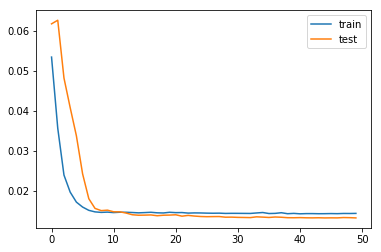

In [34]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Prediction and evaluation

In [35]:
# prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [36]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [37]:
# invert scaling for actual
inv_y = scaler.inverse_transform(test_X)
inv_y = inv_y[:,0]

In [38]:
# create a dataframe for prediction plot
df_plot = pd.DataFrame()
df_plot['date'] = df.index[-35039:]
df_plot['predict'] = inv_yhat
df_plot['test'] = inv_y
df_plot.index = df_plot['date'] 
df_plot.drop(columns=['date'],inplace=True)

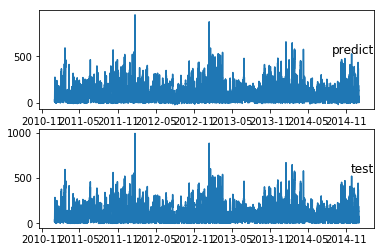

In [39]:
# show comparision of prediction and test
pyplot.subplot(2, 1, 1)
pyplot.plot(df_plot['predict'])
pyplot.title(df_plot['predict'].name, y=0.5, loc='right')
pyplot.subplot(2, 1, 2)
pyplot.plot(df_plot['test'])
pyplot.title(df_plot['test'].name, y=0.5, loc='right')
pyplot.show()

In [41]:
# calculate RMSE (Root Mean Squared Error)
np.sqrt(mean_squared_error(inv_y, inv_yhat))

3.8358355